図13.2のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#2次遅れ系のパラメータを与える
K = 1.0
omega = 10
zeta = 0.5

#伝達関数の分子・分母多項式を与える
num = [0, 0, K * omega**2] #ζ=0.5の場合の分子多項式
den = [1, 2 * zeta * omega, omega**2] #ζ=0.5の場合の分母多項式

#積分制御のパラメータを与える
Ki1 = 1 #K_i=1
Ki2 = 3 #K_i=3
Ki3 = 9 #K_i=9

#積分制御の分子・分母多項式と伝達関数表現
numc1 = [0, Ki1] #K_i = 1の場合の分子多項式
numc2 = [0, Ki2] #K_i = 3の場合の分子多項式
numc3 = [0, Ki3] #K_i = 9の場合の分子多項式
denc = [1,0] #分母多項式

#制御対象とコントローラの伝達関数表現を与える
sys = matlab.tf(num, den) #制御対象の伝達関数表現    
c1 = matlab.tf(numc1, denc) #K_i=1の場合のコントローラの伝達関数表現
c2 = matlab.tf(numc2, denc) #K_i=3の場合のコントローラの伝達関数表現
c3 = matlab.tf(numc3, denc) #K_i=9の場合のコントローラの伝達関数表現

#コントローラと制御対象のフィードバック結合を求める
sysc1 = matlab.feedback(c1*sys,1,-1) #K_i=1の場合のフィードバック結合
sysc2 = matlab.feedback(c2*sys,1,-1) #K_i=3の場合のフィードバック結合
sysc3 = matlab.feedback(c3*sys,1,-1) #K_i=9の場合のフィードバック結合

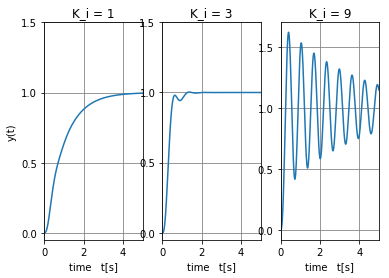

In [3]:
#時間変数の定義
t = arange(0, 5, 0.01) #0から5まで0.01刻み

#ステップ応答の計算
y1, t1 = matlab.step(sysc1,t) #K_i = 1の場合のステップ応答
y2, t2 = matlab.step(sysc2,t) #K_i = 3の場合のステップ応答
y3, t3 = matlab.step(sysc3,t) #K_i = 9の場合のステップ応答

#図13.2(a)のプロット
plt.subplot(1,3,1) #複数の図を並べるためのコマンド．1行3列の1列目という意味
plt.plot(t1, y1) #ステップ応答をプロット
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.yticks([0,0.5,1.0,1.5]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("K_i = 1") #タイトルの表示

#図13.2(b)のプロット
plt.subplot(1,3,2) #複数の図を並べるためのコマンド．1行3列の2列目という意味
plt.plot(t2, y2) #ステップ応答をプロット
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.yticks([0,0.5,1.0,1.5]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
#plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("K_i = 3") #タイトルの表示

#図13.2(c)のプロット
plt.subplot(1,3,3) #複数の図を並べるためのコマンド．1行3列の3列目という意味
plt.plot(t3, y3) #ステップ応答をプロット
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.yticks([0,0.5,1.0,1.5]) #縦軸出力の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
#plt.ylabel("y(t)") #縦軸のラベル表示
plt.title("K_i = 9") #タイトルの表示

plt.show() #グラフの表示

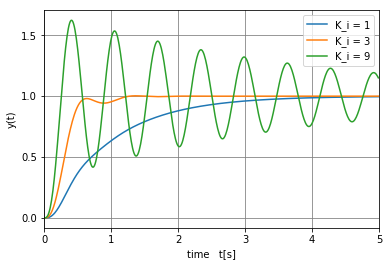

In [4]:
#図13.2を同一グラフにプロット
plt.plot(t1, y1, label = "K_i = 1") #ステップ応答をプロット
plt.plot(t2, y2, label = "K_i = 3") #ステップ応答をプロット
plt.plot(t3, y3, label = "K_i = 9") #ステップ応答をプロット
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.yticks([0,0.5,1.0,1.5]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示